In [ ]:
import pyvisa
import numpy as np
from math import log10
from pathlib import Path
import shutil
from time import sleep
import matplotlib.pyplot as plt
import AFG3022C_Control as AFG
import KS33600A_Control as KS
import PLabs as PLAB
INSTRUMENT_ID = 'GPIB0::11::INSTR'
SETTLING_TIME = 10
SOURCE_FILE = 'C:/USERS/PUBLIC/Public Documents/Texas Instruments/Plabs-SAR-EVM/Device Files/AD8860/Formatted Rx Data/Formatted Data RX File_0.bin'
DEST_PATH = Path.cwd() / 'Data'

In [2]:
# Check if the device is there
rm = pyvisa.ResourceManager()
instruments = rm.list_resources()
print(instruments)

('USB0::0x0957::0x5707::MY59004733::INSTR',)


In [ ]:
# 'GPIB0::11::INSTR'
INSTRUMENT_ID = 'USB0::0x0957::0x5707::MY59004733::INSTR'
KS_handle = KS.FuncGenConnect(INSTRUMENT_ID)
# if not AFG_handle:
#     print('Could not find instrument, aborting...')
#     quit()

# AFG.voltage_setup(AFG_handle, 2,0,5)
# AFG.sinusoid_setup(AFG_handle,2,2.5,5,2e3,0)

Agilent Technologies,33622A,MY59004733,A.02.03-3.15-03-64-02



In [4]:
AFG.sinusoid_setup(AFG_handle,2,2.5,5,2e3,0)
AFG.output_ON(AFG_handle,2)

In [3]:
start_freq = 0.1e3  # 0.1 kHz in Hz
stop_freq1 = 250e3   # 250 kHz in Hz
stop_freq2 = 20e3 # 20kHZ
points_per_decade = 10

# Calculate the number of decades (logarithmically)
num_decades1 = np.log10(stop_freq1 / start_freq)
num_decades2 = np.log10(stop_freq2 / start_freq)
# print(num_decades)

# Total number of points
total_points1 = int(points_per_decade * num_decades1)
total_points2 = int(points_per_decade * num_decades2)
# print(total_points)

# Generate logarithmically spaced points
frequencies1 = np.logspace(np.log10(start_freq), np.log10(stop_freq1), total_points1)
frequencies2 = np.logspace(np.log10(start_freq), np.log10(stop_freq2), total_points2)

In [ ]:
# DEST_PATH = '..'/ Path.cwd() / 'Data'
# print(DEST_PATH)

import os

file_path = r'C:\Users\Public\Documents\Texas Instruments\Plabs-SAR-EVM\Device Files\ADS8860\Formatted Rx Data\Formatted Data RX File_0.bin'

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found!")

In [ ]:
channel = 2
offset = 0
amp = 5
phase = 0
SETTLING_TIME = 10
SOURCE_FILE = r'C:\Users\Public\Documents\Texas Instruments\Plabs-SAR-EVM\Device Files\ADS8860\Formatted Rx Data\Formatted Data RX File_0.bin'
DEST_PATH = r'C:\\Chengming_Li\\GitHub/ECE266_CMOSCircuitLab\\Lab6_EvalADC\\Data_250kHz'
# PLAB.GetADCData(SOURCE_FILE, DEST_PATH, 1e3)
# AFG.output_ON(AFG_handle, 2)
# for freq in frequencies1:
#     print(f'Measuring {freq} Hz...')
#     AFG.sinusoid_setup(AFG_handle,channel, offset, amp, freq)
#     sleep(SETTLING_TIME)
#     if not PLAB.GetADCData(SOURCE_FILE, DEST_PATH, freq):
#         print('Error copying file, aborting...')
#         quit()

#     print('Done!')
# AFG.output_OFF(AFG_handle, 2)

In [ ]:
channel = 2
offset = 0
amp = 5
phase = 0
SETTLING_TIME = 10
SOURCE_FILE = r'C:\Users\Public\Documents\Texas Instruments\Plabs-SAR-EVM\Device Files\ADS8860\Formatted Rx Data\Formatted Data RX File_0.bin'
DEST_PATH = r'C:\\Chengming_Li\\GitHub/ECE266_CMOSCircuitLab\\Lab6_EvalADC\\Data_20kHz'
PLAB.GetADCData(SOURCE_FILE, DEST_PATH, 1e3)
# AFG.output_ON(AFG_handle, 2)
# for freq in frequencies2:
#     print(f'Measuring {freq} Hz...')
#     AFG.sinusoid_setup(AFG_handle,channel, offset, amp, freq)
#     sleep(SETTLING_TIME)
#     if not PLAB.GetADCData(SOURCE_FILE, DEST_PATH, freq):
#         print('Error copying file, aborting...')
#         quit()

#     print('Done!')
# AFG.output_OFF(AFG_handle, 2)

In [4]:
# INL and DNL calculation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the path to your CSV file
data = pd.read_excel('../Data/INL_DNL_FromFuncGen.xlsx', engine='openpyxl')

codes = data['Codes - Histogram']
hits = data['#Hits - Histogram']


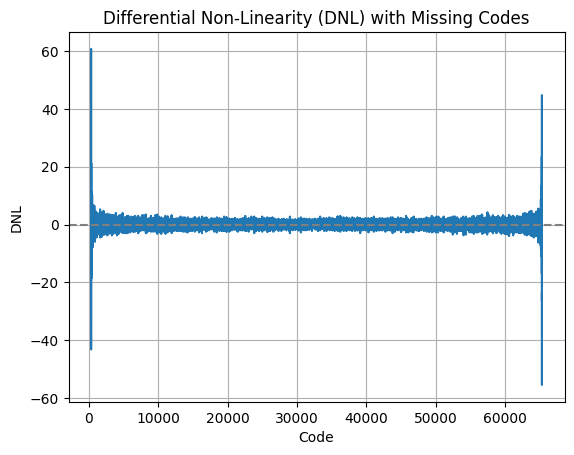

In [15]:
codes = data['Codes - Histogram'].to_numpy()
hits = data['#Hits - Histogram'].to_numpy()
total_code = 2**16
Vpp = 5
# LSB resolution
resolution = Vpp / total_code

hits_sum = np.sum(hits)
ideal_hits = hits_sum / total_code
DNL = np.zeros(np.size(codes))

# codes = np.arange(0,total_code-1)

# Add_hits = np.zeros(327)
# hits = np.concatenate((Add_hits, hits))
# Add_hits2 = np.zeros(np.size(DNL)-np.size(hits))
# hits = np.concatenate((hits, Add_hits2))

# Digital Output
# digital_v = np.zeros(np.size(codes))
# for index, value in enumerate(codes):
#     digital_v[index] = resolution * codes[index]


#DNL = |[(VD+1- VD)/VLSB-IDEAL - 1] 
for index in range(1,np.size(codes)-2):
    DNL[index] = (hits[index+1] - hits[index]) / ideal_hits

plt.plot(codes,DNL)
plt.xlabel("Code")
plt.ylabel("DNL")
plt.title("Differential Non-Linearity (DNL) with Missing Codes")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
# plt.ylim(-1, 1)
plt.show()


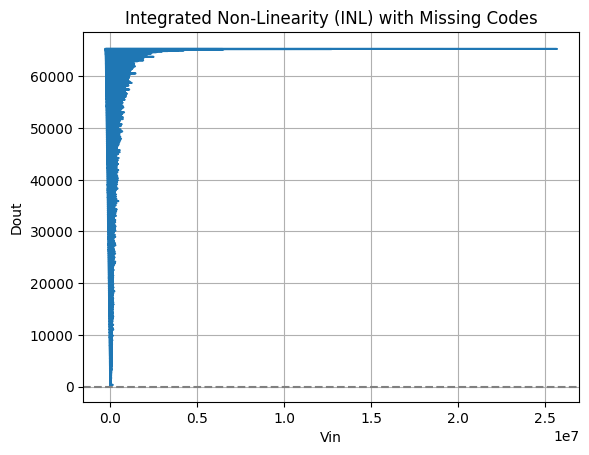

In [14]:
INL = np.zeros(np.size(DNL))
# Digital Output
digital_v = np.zeros(np.size(codes))
for index, value in enumerate(codes):
    digital_v[index] = (hits[index] - ideal_hits) * codes[index]

# INL = | [(VD - VZERO)/VLSB-IDEAL] - D |
for index in range(1,np.size(codes)-1):
    INL[index] = (hits[index]-hits[0])/ideal_hits

plt.plot(digital_v,codes)
plt.xlabel("Vin")
plt.ylabel("Dout")
plt.title("Integrated Non-Linearity (INL) with Missing Codes")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
# plt.ylim(-1, 1)
plt.show()


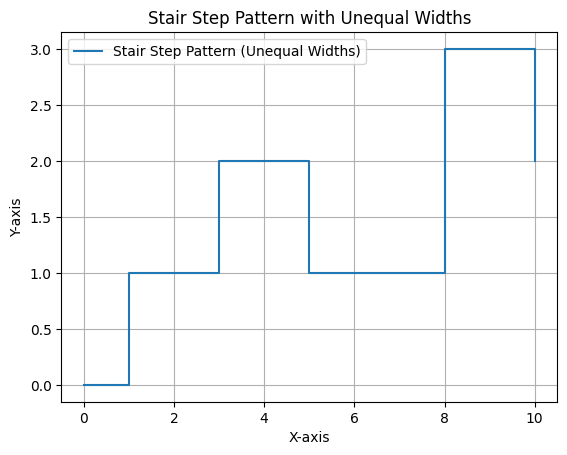

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define x values with unequal spacing
x = np.array([0, 1, 3, 5, 8, 10])  # Unequal widths
y = np.array([0, 1, 2, 1, 3, 2])   # Corresponding y values

# Create the stair-step pattern
plt.step(x, y, where='post', label='Stair Step Pattern (Unequal Widths)')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Stair Step Pattern with Unequal Widths')
plt.legend()
plt.grid()

# Show the plot
plt.show()